In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

2024-06-10 20:09:35.570283: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 20:09:35.570353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 20:09:35.571766: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-10 20:09:35.579572: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 20:09:36.385198: W tensorflow/compiler/tf2

In [3]:
# Define linear regression Model
class LinearRegression(tf.keras.Model):
    def __init__(self, num_inputs, num_outputs):
        super(LinearRegression,self).__init__()
        self.W = tf.Variable(
            tf.random_normal_initializer()((num_inputs, num_outputs)))
        self.b = tf.Variable(tf.zeros(num_outputs))
        self.params = [self.W, self.b]
    
    def call(self, inputs):
        return tf.matmul(inputs, self.W)+self.b
        

In [4]:
# Create a Dataset

N = 100
D = 1
K = 1
X = np.random.random((N,D)) * 2 - 1
w = np.random.randn(D,K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1)*0.1

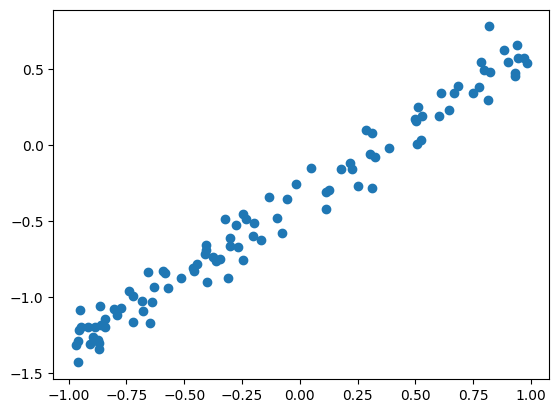

In [5]:
plt.scatter(X,Y)

In [6]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [7]:
# Loss

def get_loss(model, inputs, targets):
    predictions = model(inputs)
    error = targets - predictions
    return tf.reduce_mean(tf.square(error))

In [8]:
# Gradient function
def get_grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        # calculate the loss
        loss_value = get_loss(model, inputs, targets)
    
    return tape.gradient(loss_value, model.params)



In [12]:
# Create and train the model
model = LinearRegression(D,K)

print("Initial Params:",model.W,model.b)

Initial Params: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.0040223]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [13]:
# Store the losses 
losses = []

# Create an optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# Run the training loop
for i in range(100):
    # get gradient
    grads = get_grad(model, X, Y)
    # Do one step of gradient descent: param <= param - learning_rate * grad
    optimizer.apply_gradients(zip(grads, model.params))

    # Store the loss
    loss = get_loss(model, X, Y)
    losses.append(loss)

2024-06-10 21:45:25.722329: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-10 21:45:26.085594: I external/local_xla/xla/service/service.cc:168] XLA service 0xb0d9c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-10 21:45:26.085652: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-06-10 21:45:26.136925: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1718045126.225452 2815241 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


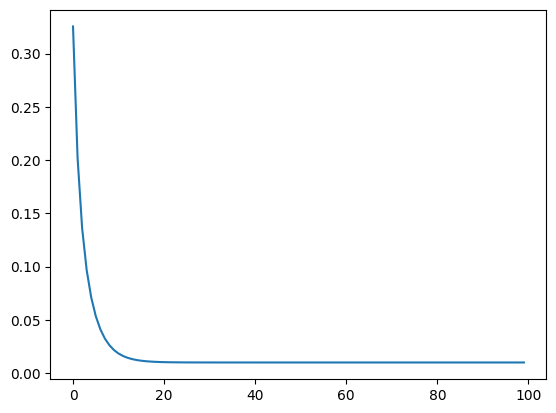

In [14]:
plt.plot(losses)

4/4 [==============================] - 0s 3ms/step


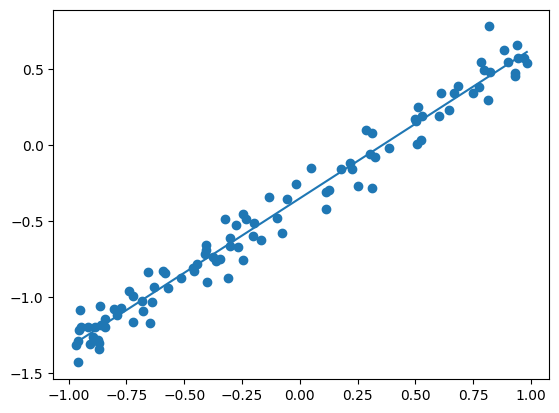

In [15]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1,1)).flatten()
plt.scatter(X, Y)
plt.plot(x_axis, y_axis)

In [16]:
print("Predicted Params:", model.W, model.b)

Predicted Params: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.9804044]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.35116634], dtype=float32)>


In [18]:
print('True params:', w, b)

True params: [[0.97901763]] -0.3416532705035529
